<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/main/formula1_mini_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!git clone https://github.com/tanisaur/forumla1-mini-sprint.git


fatal: destination path 'forumla1-mini-sprint' already exists and is not an empty directory.


Team 19:

We are creating a Hypothesis from Formula 1 Data Sets recruiting for a specic constructor by analyzing and focusing on Data from the following files:

*driver
*results
*lap times

We are going to do a basic analysis of the top ten drivers.

How many wins they have from the previous season for 2023?
The average race lap times for the 2023 per driver?



# **Import libraries**

In [43]:
pip install fastf1

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
%matplotlib inline

**Read in data**

In [29]:
# prompt:

import pandas as pd

driver_standings = pd.read_csv('//content/forumla1-mini-sprint/data/driver_standings.csv')
drivers = pd.read_csv('/content/forumla1-mini-sprint/data/drivers.csv')
results = pd.read_csv('/content/forumla1-mini-sprint/data/results.csv')
constructors = pd.read_csv('/content/forumla1-mini-sprint/data/constructors.csv')
races = pd.read_csv('/content/forumla1-mini-sprint/data/races.csv')


Find the top 10 drivers base upon the points overall in history.


In [30]:
# Group the results by driver and calculate the sum of points
driver_points = results.groupby('driverId')['points'].sum()
# Sort the drivers by points in descending order
sorted_drivers = driver_points.sort_values(ascending=False)
# Print the top 5 drivers and their points
print(sorted_drivers.head(5))

driverId
1      4540.5
20     3098.0
830    2275.5
4      2203.0
8      1873.0
Name: points, dtype: float64


In [31]:
top_drivers = pd.merge(driver_standings, drivers, on='driverId')

top_drivers = top_drivers.groupby('driverId')['points'].sum()
top_drivers = top_drivers.sort_values(ascending=False).head(10)

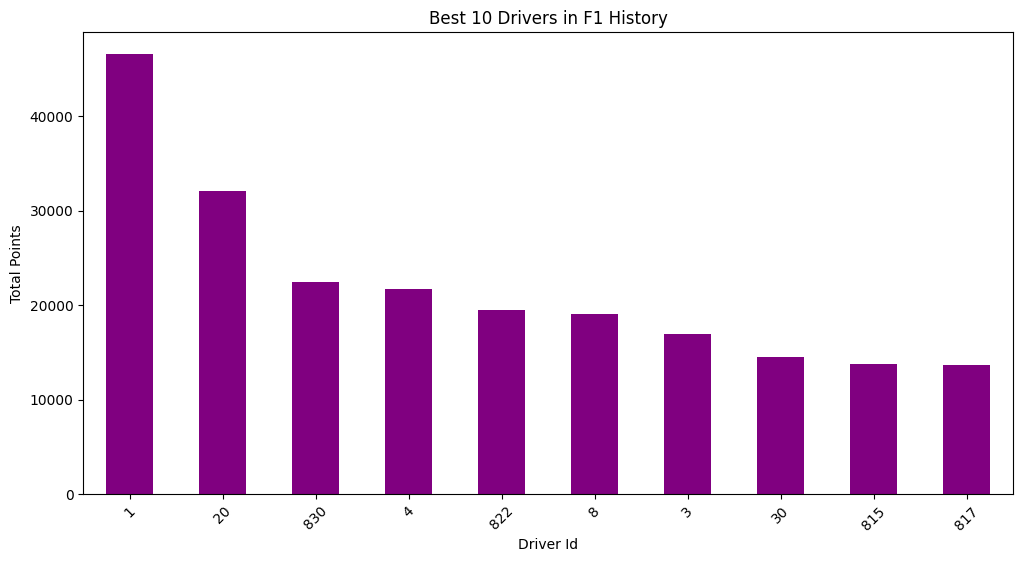

In [32]:
plt.figure(figsize=(12, 6))
top_drivers.plot(kind='bar', color='purple')
plt.xlabel('Driver Id')
plt.ylabel('Total Points')
plt.title('Best 10 Drivers in F1 History')
plt.xticks(rotation=45)
plt.show()

**2023 Standings**

In [33]:
#Selected columns
drivers = drivers[["driverId", "driverRef", "nationality"]]
driver_standings = driver_standings[['driverId','raceId','driverStandingsId', 'points', 'position', 'wins']]

# Merge the DataFrames on the specified columns
combined_driver_info = pd.merge(driver_standings, drivers, on=['driverId'])

# Display the combined DataFrame
combined_driver_info

,driverId,raceId,driverStandingsId,points,position,wins,driverRef,nationality
0,1,18,1,10.0,1,1,hamilton,British
1,1,19,9,14.0,1,1,hamilton,British
2,1,20,27,14.0,3,1,hamilton,British
3,1,21,48,20.0,2,1,hamilton,British
4,1,22,69,28.0,3,1,hamilton,British
...,...,...,...,...,...,...,...,...
34119,858,1106,72077,0.0,20,0,sargeant,American
34120,858,1107,72117,0.0,19,0,sargeant,American
34121,858,1108,72137,0.0,19,0,sargeant,American
34122,858,1109,72157,0.0,19,0,sargeant,American


In [34]:
#Obtain last year races
races_2023 = races[races['year'] == 2023]
races_2023 = races_2023[['raceId','year','circuitId','name']]
races_2023

,raceId,year,circuitId,name
1079,1098,2023,3,Bahrain Grand Prix
1080,1099,2023,77,Saudi Arabian Grand Prix
1081,1100,2023,1,Australian Grand Prix
1082,1101,2023,73,Azerbaijan Grand Prix
1083,1102,2023,79,Miami Grand Prix
1084,1104,2023,6,Monaco Grand Prix
1085,1105,2023,4,Spanish Grand Prix
1086,1106,2023,7,Canadian Grand Prix
1087,1107,2023,70,Austrian Grand Prix
1088,1108,2023,9,British Grand Prix


In [35]:
#include only the following columns in results
new_results = results[['raceId','constructorId','laps','time','milliseconds','rank','fastestLapTime', 'fastestLapSpeed']]
new_results.head()

,raceId,constructorId,laps,time,milliseconds,rank,fastestLapTime,fastestLapSpeed
0,18,1,58,1:34:50.616,5690616,2,1:27.452,218.300
1,18,2,58,+5.478,5696094,3,1:27.739,217.586
2,18,3,58,+8.163,5698779,5,1:28.090,216.719
3,18,4,58,+17.181,5707797,7,1:28.603,215.464
4,18,1,58,+18.014,5708630,1,1:27.418,218.385


In [36]:
# Merge combined_driver_info and races_2023 on the 'raceId' column
new_dataset = pd.merge(combined_driver_info, races_2023, on='raceId')

# Merge the resulting DataFrame with new_results on the 'raceId' column
new_dataset = pd.merge(new_dataset, new_results, on='raceId')

# Display the head of the new_dataset
new_dataset.head()

,driverId,raceId,driverStandingsId,points,position,wins,driverRef,nationality,year,circuitId,name,constructorId,laps,time,milliseconds,rank,fastestLapTime,fastestLapSpeed
0,1,1098,72010,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,9,57,1:33:56.736,5636736,6,1:36.236,202.452
1,1,1098,72010,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,9,57,+11.987,5648723,7,1:36.344,202.225
2,1,1098,72010,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,117,57,+38.637,5675373,5,1:36.156,202.620
3,1,1098,72010,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,6,57,+48.052,5684788,14,1:37.130,200.588
4,1,1098,72010,10.0,5,0,hamilton,British,2023,3,Bahrain Grand Prix,131,57,+50.977,5687713,10,1:36.546,201.802


In [37]:
most_wins_driver = new_dataset.groupby('driverRef')['wins'].sum().sort_values(ascending=False).index[0]
print(f"Driver with the most wins in 2023: {most_wins_driver}")

Driver with the most wins in 2023: max_verstappen


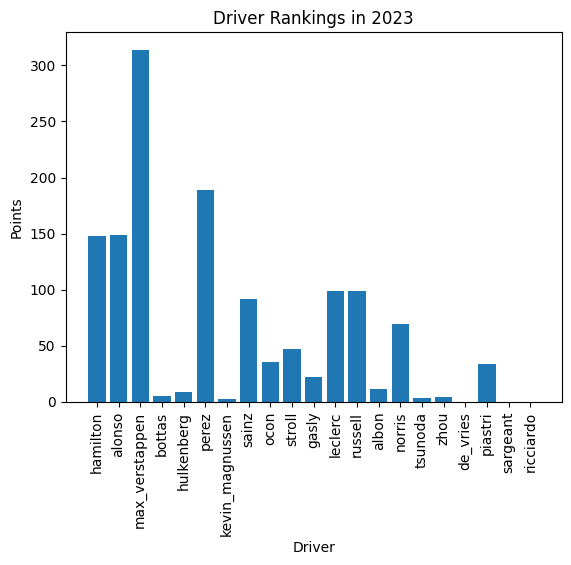

In [38]:
# Extract the required data from new_dataset
driver_names = new_dataset['driverRef'].tolist()
driver_ranks = new_dataset['points'].tolist()

# Create the bar chart
plt.bar(driver_names, driver_ranks)

# Add labels and title
plt.xlabel("Driver")
plt.ylabel("Points")
plt.title("Driver Rankings in 2023")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [97]:
# Group the results by constructors and show their rank for the top ten
constructors_rank = results.groupby('constructorId')['rank'].rank()

# Sort the constructors by rank in ascending order
sorted_constructors = constructors_rank.sort_values(ascending=False)

# Print the top 10 constructors and their rank
print(sorted_constructors.head(10))
print(constructors.head(10))

4751     1562.5
17377    1562.5
17448    1562.5
3878     1562.5
17445    1562.5
3881     1562.5
17440    1562.5
17436    1562.5
10740    1562.5
17427    1562.5
Name: rank, dtype: float64
   constructorId constructorRef         name nationality  \
0              1        mclaren      McLaren     British   
1              2     bmw_sauber   BMW Sauber      German   
2              3       williams     Williams     British   
3              4        renault      Renault      French   
4              5     toro_rosso   Toro Rosso     Italian   
5              6        ferrari      Ferrari     Italian   
6              7         toyota       Toyota    Japanese   
7              8    super_aguri  Super Aguri    Japanese   
8              9       red_bull     Red Bull    Austrian   
9             10    force_india  Force India      Indian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/

In [110]:
# Code and Group the results by name constructors and show their rank from the wins for the top ten
# Sort the named constructors by rank in ascending order
# Print the top 10 named constructors and their rank from provided datasets

import pandas as pd
import matplotlib.pyplot as plt
# Group the results by constructors and show their rank for the top ten
constructors_rank = results.groupby('constructorId')['points'].rank()
constructors_rank.name = 'constructor_rank'

# Sort the constructors by rank in ascending order
sorted_constructors = constructors_rank.sort_values(ascending=False)

# Print the top 10 constructors and their rank
print(sorted_constructors.head(10))

# Merge the constructors and results dataframes on the 'constructorId' column
constructors_with_results = pd.merge(constructors, results, on='constructorId')

# Group the results by constructor name and show their rank for the top ten
constructors_rank_by_name = constructors_with_results.groupby('name')['points'].rank()

# Sort the constructors by rank in ascending order
sorted_constructors_by_name = constructors_rank_by_name.sort_values(ascending=False)

# Print the top 10 named constructors and their rank
print(sorted_constructors_by_name.head(10))


25440    2370.5
25400    2370.5
21797    2354.5
24460    2354.5
20320    2354.5
23897    2354.5
23374    2354.5
20560    2354.5
21253    2354.5
23414    2354.5
Name: constructor_rank, dtype: float64
7230    2370.5
7234    2370.5
7248    2354.5
7250    2354.5
6834    2354.5
7134    2354.5
7136    2354.5
6782    2354.5
7138    2354.5
7048    2354.5
Name: points, dtype: float64


In [73]:
# Create a bar plot for the top 10 constructors
top_constructors = pd.merge(results, constructors, on='constructorId')
top_constructors = top_constructors.groupby('constructorId')['rank'].rank()
top_constructors = top_constructors.sort_values(ascending=False).head(10)

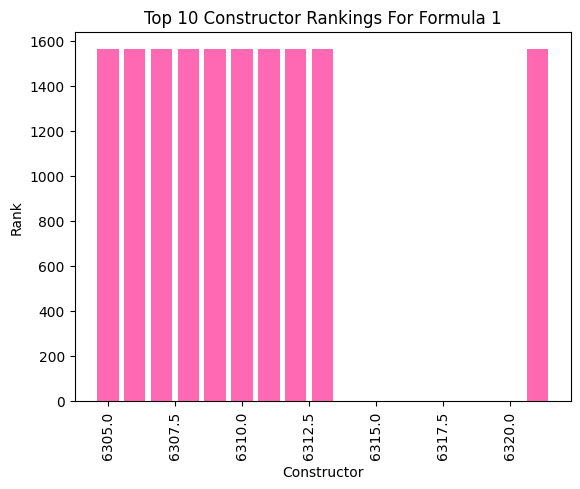

In [106]:
# prompt: code and Fix plt bar with construtor name and rank using datasets provided

import matplotlib.pyplot as plt
# Extract the required data from top_constructors
constructor_names = top_constructors.index.tolist()
constructor_ranks = top_constructors.values.tolist()

# Create the bar chart
plt.bar(constructor_names[:10], constructor_ranks[:10], color='hotpink')

# Add labels and title
plt.xlabel("Constructor")
plt.ylabel("Rank")
plt.title("Top 10 Constructor Rankings For Formula 1")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()